# Proof of concept : Evolution diachronique du schéma accentuel 
## Buchanan vs Walker
Ce notebook est une première comparaison des dictionnaires Buchannan et Walker.
Le but est de tester la possibilité d'identifier les mots dont l'accent tonic à évolué entre ces deux dictionnaires.
Pour ce faire il faut rendre comparable et donc "régulariser" les mots vedettes et les POS.

Dans un 1er temps, nous souhaitons nous concentrer sur les verbes et les noms (pour éviter de faire le mapping des tous les POS, de plus ces catégories representent une très grande majorité des entrées).

### Table des matières :

* [Régularisation des headword, POS des deux dictionnaires](#regularisationBuchanan)
    * [Régularisation dictionnaire Buchanan](#regularisationBuchanan)
    * [Régularisation dictionnaire Walker](#regularisationWalker)

* [Couverture lexicale entre les dictionnaires](#couvertureLexicale)

* [Etude sur la terminaison en double voyelle](#terminaisondoubleVoyelle)

### Code d'initialisation

In [3]:
%matplotlib inline

#import de la libraire pandas pour faciliter la manipulation de données matricielles 
import pandas as pd
#import de la bibliotheque pour la creation de dossier
import os

#definition du dossier de sortie de traitements
pathOutputCSV = "./datas/outputs/"
#creation du repertoire
os.makedirs(pathOutputCSV, exist_ok=True)


---
## Buchanan - Regularisation <a class="anchor" id="regularisationBuchanan"></a>

In [68]:
# chargement du dictionnaire Buchanan à partir de sa version matricielle (tableur CSV)
pathCsvFile = "./datas/Buchanan2005.csv"
Buchanan = pd.read_csv(pathCsvFile, sep=";", encoding="utf-8")
Buchanan.head(5)


,headword,pronunciation,POS,accent,schAccent,schGraph,nbSyll,page
0,['abacus'],['a(ba(ku(ss'],['/n/lat/'],['a@bacus'],['100'],['V1CVCVC'],['3'],['abacus-ablation']
1,['abaft'],['a(baft'],['/adv/'],['aba@ft'],['01'],['VCV1CC'],['2'],['abacus-ablation']
2,['abandon'],['a(ba(ndu(n'],['/v/'],['aba@ndon'],['010'],['VCV1CCVC'],['3'],['abacus-ablation']
3,['abandoned'],['a(ba(ndu(ni(d'],['/adj/'],['aba@ndoned'],['0100'],['VCV1CCVCVC'],['4'],['abacus-ablation']
4,['abase'],['a(baiss'],['/v/'],['aba@se'],['01'],['VCV1CV'],['2'],['abacus-ablation']


In [5]:
#les fonctions de régularisation de ce dictionnaire
def regBuchananHwd(hwd):
    hwdR = hwd.lower()
    hwdR = hwdR.replace("[","")
    hwdR = hwdR.replace("]","")
    hwdR = hwdR.replace("'","")
    return hwdR

def regBuchananSchAccent(schAccent):
    schAccentR = schAccent.lower()
    schAccentR = schAccentR.replace("[","")
    schAccentR = schAccentR.replace("]","")
    schAccentR = schAccentR.replace("'","")
    schAccentR = schAccentR.strip()
    #ajout du tiret entre les chiffres
    schAccentR = "-".join(schAccentR)
    return schAccentR

def regBuchananPOS(pos):
    posR = pos.lower()
    posR = pos.replace("[","")
    posR = posR.replace("]","")
    posR = posR.replace("'","")
    posR = posR.replace("/","")
    posR = posR.strip()
    
    if posR=="v":
        return "verb"
    elif posR=="n":
        return "noun"
    else:   
        return "notReg-"+posR


In [6]:
#création des colonnes régularisées hwdR, schAccentR, posR
Buchanan["hwdR"] = Buchanan.apply(lambda x: regBuchananHwd(x.headword),1)
Buchanan["schAccentR"] = Buchanan.apply(lambda x: regBuchananSchAccent(x.schAccent),1)
Buchanan["posR"] = Buchanan.apply(lambda x: regBuchananPOS(x.POS),1)

Buchanan.head(5)

,headword,pronunciation,POS,accent,schAccent,schGraph,nbSyll,page,hwdR,schAccentR,posR
0,['abacus'],['a(ba(ku(ss'],['/n/lat/'],['a@bacus'],['100'],['V1CVCVC'],['3'],['abacus-ablation'],abacus,1-0-0,notReg-nlat
1,['abaft'],['a(baft'],['/adv/'],['aba@ft'],['01'],['VCV1CC'],['2'],['abacus-ablation'],abaft,0-1,notReg-adv
2,['abandon'],['a(ba(ndu(n'],['/v/'],['aba@ndon'],['010'],['VCV1CCVC'],['3'],['abacus-ablation'],abandon,0-1-0,verb
3,['abandoned'],['a(ba(ndu(ni(d'],['/adj/'],['aba@ndoned'],['0100'],['VCV1CCVCVC'],['4'],['abacus-ablation'],abandoned,0-1-0-0,notReg-adj
4,['abase'],['a(baiss'],['/v/'],['aba@se'],['01'],['VCV1CV'],['2'],['abacus-ablation'],abase,0-1,verb


In [7]:
#on ne garde pour le moment que les colonnes  hwdR, schAccentR, posR (de valeurs : verb ou noun)
#Buchanan = Buchanan[Buchanan['posR'].isin(["verb","noun"])]

BuchananR = Buchanan[["hwdR","posR","schAccentR"]].copy()
BuchananR.head(10)
#print(len(BuchananR))

,hwdR,posR,schAccentR
0,abacus,notReg-nlat,1-0-0
1,abaft,notReg-adv,0-1
2,abandon,verb,0-1-0
3,abandoned,notReg-adj,0-1-0-0
4,abase,verb,0-1
5,abasement,noun,0-1-0-0
6,abash,verb,0-1
7,abate,verb,0-1
8,abatement,noun,0-1-0-0
9,abbess,noun,1-0


# Walker - Regularisation  <a class="anchor" id="regularisationWalker"></a>

In [69]:
# chargement du dictionnaire Walker à partir de sa version matricielle (tableur CSV)
pathCsvFile = "./datas/Walker_ExtractFromXml.csv"
Walker = pd.read_csv(pathCsvFile, sep=";", encoding="utf-8", dtype ={'headword':str}, low_memory=False)

Walker.head(3)

,headword,pronunciation,POS,definition,note authorial,note editorial,cross reference,cross reference in definition,cross reference in note,idSuperEntry,headwordWarning,pronWarning,posWarning,defWarning,xrWarning,xrDefWarning,xrNoteWarning
0,['A'],[],"[' THE first letter of the alphabet,']","[' A, An article set before nouns of the singu...",['☞ The change of the letter a into an before ...,[],['73.'],[],['An'],NaN,[],['no content'],['missing dot'],[],[],[],[]
1,['ABACUS'],['a4bʹ-a4-ku2s'],['s.'],['[Lat.] A counting table\xa0; the uppermost m...,[],[],[],[],[],NaN,[],[],[],[],[],[],[]
2,['ABAFT'],['a4-ba4ftʹ'],['adv.'],"[' From the fore part of the ship, towards the...",[],[],['545.'],[],[],NaN,[],[],[],[],[],[],[]


### Code des fonctions de régularisation de dictionnaire de Walker

In [9]:
#les fonctions de régularisation de ce dictionnaire
import re

def regWalkerHwd(hwd):
    
    hwdR = str(hwd).replace("To ","")
    hwdR = hwdR.replace("[","")
    hwdR = hwdR.replace("]","")
    hwdR = hwdR.replace("'","")
    hwdR = hwdR.lower()

    return hwdR

def regWalkerSchAccent(pronunciation):
    
    schAccentR = str(pronunciation).replace("[","")
    schAccentR = schAccentR.replace("]","")
    schAccentR = schAccentR.replace("'","")
    schAccentR = schAccentR.strip()

    #listPron = schAccentR.split(', or, ')
    listPron = re.compile(", or,*").split(schAccentR)
    
    schAccentResult = ""
    
    for iPron,partPron in enumerate(listPron):
        binRes = ""
        res = partPron.split("-")

        for i, part in enumerate(res):
            if "ʹ" in part:
                binRes+="1"
            else:
                binRes+="0"

            if i<(len(res)-1):
                binRes+="-"
         
        #schAccentResult = binRes
        if iPron == 0:
            schAccentResult = binRes
        else:
            schAccentResult = schAccentResult+" or "+binRes
        

                
    return schAccentResult

def regWalkerPOS(pos):
    posR = pos.replace("[","")
    posR = posR.replace("]","")
    posR = posR.replace("'","")
    posR = posR.replace("/","")
    posR = posR.strip()
    
    if posR=="v. a.":
        return "verb"
    elif posR=="s.":
        return "noun"
    else:   
        return "notReg-"+posR

In [71]:
# ce dictionnaire peut contenir plusieur prononciations
# nous les conservons en l'état

# ceci est un test unitaire de la fonction regWalkerSchAccent
tp = "['a4-ka4dʹ-de1-me1, or, a4kʹ-a4-de2m-e1']"
print(regWalkerSchAccent(tp))
tp = "['a4-ka4dʹ-de1-me1']"
print(regWalkerSchAccent(tp))
tp = "['a4-ka4dʹ-de1-me1, or a4kʹ-a4-de2m-e1']"
print(regWalkerSchAccent(tp))


0-1-0-0 or 1-0-0-0
0-1-0-0
0-1-0-0 or 1-0-0-0


In [11]:
#création des colonnes régularisées hwdR, schAccentR, posR

Walker["hwdR"] = Walker.apply(lambda x: regWalkerHwd(x.headword),1)
Walker["schAccentR"] = Walker.apply(lambda x: regWalkerSchAccent(x.pronunciation),1)
Walker["posR"] = Walker.apply(lambda x: regWalkerPOS(x.POS),1)

#on enleve les lignes ou il y a un warning sur le mot vedette
Walker = Walker[Walker["headwordWarning"].isin(["[]"])]

Walker.head(3)

,headword,pronunciation,POS,definition,note authorial,note editorial,cross reference,cross reference in definition,cross reference in note,idSuperEntry,headwordWarning,pronWarning,posWarning,defWarning,xrWarning,xrDefWarning,xrNoteWarning,hwdR,schAccentR,posR
0,['A'],[],"[' THE first letter of the alphabet,']","[' A, An article set before nouns of the singu...",['☞ The change of the letter a into an before ...,[],['73.'],[],['An'],NaN,[],['no content'],['missing dot'],[],[],[],[],a,0,"notReg-THE first letter of the alphabet,"
1,['ABACUS'],['a4bʹ-a4-ku2s'],['s.'],['[Lat.] A counting table\xa0; the uppermost m...,[],[],[],[],[],NaN,[],[],[],[],[],[],[],abacus,1-0-0,noun
2,['ABAFT'],['a4-ba4ftʹ'],['adv.'],"[' From the fore part of the ship, towards the...",[],[],['545.'],[],[],NaN,[],[],[],[],[],[],[],abaft,0-1,notReg-adv.


In [14]:
#on ne garde pour le moment que les colonnes  hwdR, schAccentR, posR (de valeurs : verb ou noun)
#Walker = Walker[Walker['posR'].isin(["verb","noun"])]

WalkerR = Walker[["hwdR","posR","schAccentR"]].copy()
WalkerR.head(3)

,hwdR,posR,schAccentR
0,a,"notReg-THE first letter of the alphabet,",0
1,abacus,noun,1-0-0
2,abaft,notReg-adv.,0-1


In [15]:
BuchananR.head(3)


,hwdR,posR,schAccentR
0,abacus,notReg-nlat,1-0-0
1,abaft,notReg-adv,0-1
2,abandon,verb,0-1-0


---
# Couverture Lexicale entre les dictionnaires  <a class="anchor" id="couvertureLexicale"></a>
les apparus et disparus

In [72]:
#le nombre de ligne de chaque dictionnaire
print('nb lines in BuchananR :',len(BuchananR))
print('nb lines in WalkerR:',len(WalkerR))

nb lines in BuchananR : 26229
nb lines in WalkerR: 38688


In [73]:
#fusion par la colonne hwdR (on ne vérifie pas pour le moment le POS)
dfBW = pd.merge(BuchananR, WalkerR, on=['hwdR','hwdR'], how='outer', indicator=True)

#renommer les colonnes _X et _Y
dfBW = dfBW.rename(columns={"posR_x": "POS_Buchanan", "schAccentR_x": "schAccentR_Buchanan","posR_y":"posR_Walker","schAccentR_y":"schAccentR_Walker","_merge":"union"})

#changer les valeurs right_only et left_only par Walker_only et Buchanan_only
#ce n'est pas la manière la plus élgante de faire, mais c'est très lisible
dfBW['union'] = dfBW['union'].replace("right_only", "Walker_only")
dfBW['union'] = dfBW['union'].replace("left_only", "Buchanan_only")

#sauvegarde cette matrice de fusion (et renommage)
dfBW.to_csv(pathOutputCSV+"dfBW.csv", encoding="utf8",sep =";",index=False)
#affichier le nombre de valeurs communes
dfBW['union'].value_counts()

both             28531
Walker_only      10368
Buchanan_only     2242
Name: union, dtype: int64

### Pour télécharger les fichiers de sorties
Cliquez <a href="datas/outputs/">ici</a>

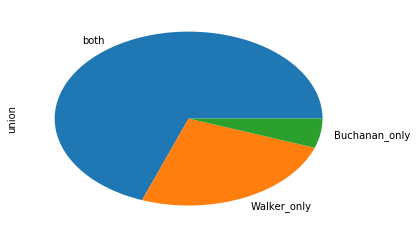

In [88]:
dfUnionCover = dfBW['union'].value_counts()
dfUnionCover.plot(kind='pie')

<div class="alert alert-warning">
<b>Remarque</b> : Nous pouvons noter que le both : 28531 et supérieur au nb lines in Buchanan : 26229. 
</div>
<div class="alert alert-success">
<b>Explication</b> : Lorsque un mot vedette est present dans Buchanan et qu'il existe pour ce même mot vedette deux POS dans Walker, cette entrée est doublées. Nous pouvons même noter l'exemple de "abject" qui existe sous 3 POS dans Walker : adj,noun et verb.


In [18]:
dfBW[dfBW['hwdR']=="abject"]

,hwdR,POS_Buchanan,schAccentR_Buchanan,posR_Walker,schAccentR_Walker,union
22,abject,notReg-adjv,1-0,notReg-adj.,1-0,both
23,abject,notReg-adjv,1-0,noun,1-0,both
24,abject,notReg-adjv,1-0,verb,0-1,both


## Supprimer les doublons des mots vedettes par dictionnaire


In [19]:
#Supprimer les doublons des mots vedettes par dictionnaire
listeHwdBuchananSansDoublons = BuchananR.drop_duplicates('hwdR')
print('nb hwd in Buchanan', len(BuchananR))
print('nb unique hwd in Buchanan',len(listeHwdBuchananSansDoublons))
print('nb hwd many entry in Buchanan', len(BuchananR)-len(listeHwdBuchananSansDoublons))

listeHwdBuchananSansDoublons.head(3)



nb hwd in Buchanan 26229
nb unique hwd in Buchanan 26142
nb hwd many entry in Buchanan 87


,hwdR,posR,schAccentR
0,abacus,notReg-nlat,1-0-0
1,abaft,notReg-adv,0-1
2,abandon,verb,0-1-0


In [20]:
listeHwdWalkerSansDoublons = WalkerR.drop_duplicates('hwdR')
listeHwdWalkerSansDoublons.head(3)

print('nb hwd in Walker', len(WalkerR))
print('nb unique hwd in Walker',len(listeHwdWalkerSansDoublons))
print('nb hwd many entry in Walker', len(WalkerR)-len(listeHwdWalkerSansDoublons))
listeHwdWalkerSansDoublons.head(3)


nb hwd in Walker 38688
nb unique hwd in Walker 34048
nb hwd many entry in Walker 4640


,hwdR,posR,schAccentR
0,a,"notReg-THE first letter of the alphabet,",0
1,abacus,noun,1-0-0
2,abaft,notReg-adv.,0-1


both             23903
Walker_only      10145
Buchanan_only     2239
Name: union, dtype: int64


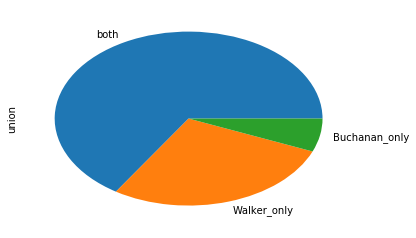

In [21]:
dfBWssDouble = pd.merge(listeHwdBuchananSansDoublons, listeHwdWalkerSansDoublons, on=['hwdR','hwdR'], how='outer', indicator=True)

#renommer les colonnes _X et _Y
dfBWssDouble = dfBWssDouble.rename(columns={"posR_x": "POS_Buchanan", "schAccentR_x": "schAccentR_Buchanan","posR_y":"posR_Walker","schAccentR_y":"schAccentR_Walker","_merge":"union"})

#changer les valeurs right_only et left_only par Walker_only et Buchanan_only
#ce n'est pas la manière la plus élgante de faire, mais c'est très lisible
dfBWssDouble['union'] = dfBWssDouble['union'].replace("right_only", "Walker_only")
dfBWssDouble['union'] = dfBWssDouble['union'].replace("left_only", "Buchanan_only")

#sauvegarde cette matrice de fusion (et renommage)
dfBWssDouble.to_csv(pathOutputCSV+"dfBWssDoublr.csv", encoding="utf8",sep =";",index=False)
#affichier le nombre de valeurs communes
dfUnionSsUnionCover = dfBWssDouble['union'].value_counts()

print(dfUnionSsUnionCover)
dfUnionSsUnionCover.plot(kind='pie')

# Créer/Exporter les matrices de mots apparus et disparus
CAD. une matrice ne contenant que les entrées propre à Buchanan, l'autre ne contenant que les entrées propre à Walker

In [23]:
dfB_only = dfBWssDouble[dfBWssDouble['union']=='Buchanan_only']
dfB_only.to_csv(pathOutputCSV+"dfB_only.csv", encoding="utf8",sep =";",index=False)

In [24]:
dfW_only = dfBWssDouble[dfBWssDouble['union']=='Walker_only']
dfW_only.to_csv(pathOutputCSV+"dfW_only.csv", encoding="utf8",sep =";",index=False)

### Pour télécharger les fichiers de sorties
Cliquez <a href="datas/outputs/">ici</a>

## Afficher un tirage aléatoire de 10 entrées propre à Buchanan

In [25]:
dfB_only.sample(n=10)

,hwdR,POS_Buchanan,schAccentR_Buchanan,posR_Walker,schAccentR_Walker,union
3642,coparceners,noun,0-1-0-0,NaN,NaN,Buchanan_only
25164,vouchsafement,noun,0-1-0,NaN,NaN,Buchanan_only
10794,magnality,noun,0-1-0-0,NaN,NaN,Buchanan_only
19915,solifidian,noun,0-0-1-0,NaN,NaN,Buchanan_only
13424,ouse,noun,0,NaN,NaN,Buchanan_only
23982,undershoot,notReg-adjv,0-0-1,NaN,NaN,Buchanan_only
25766,wightly,notReg-adv,1-0,NaN,NaN,Buchanan_only
584,algebraic,notReg-adj,0-0-1-0,NaN,NaN,Buchanan_only
23508,vintry,noun,1-0,NaN,NaN,Buchanan_only
15059,porracious,notReg-adj,0-1-0,NaN,NaN,Buchanan_only


## Afficher un tirage aléatoire de 10 entrées propre à Buchanan

In [26]:
dfW_only.sample(n=10)

,hwdR,POS_Buchanan,schAccentR_Buchanan,posR_Walker,schAccentR_Walker,union
31998,flippancy,NaN,NaN,noun,1-0-0,Walker_only
30411,diagnostick,NaN,NaN,noun,0-0-1-0,Walker_only
33226,hindermost,NaN,NaN,notReg-adj.,1-0-0,Walker_only
32864,haggardly,NaN,NaN,notReg-adv.,1-0-0,Walker_only
33618,immanacle,NaN,NaN,verb,0-1-0-0,Walker_only
35210,peartree,NaN,NaN,noun,1-0,Walker_only
27887,boggy,NaN,NaN,notReg-adj.,1-0,Walker_only
28767,china-orange,NaN,NaN,noun,1-0-1-0,Walker_only
28977,closestool,NaN,NaN,noun,1-0,Walker_only
34278,lady-fly,NaN,NaN,noun,1-0-0,Walker_only


# Observation naïve et rapide de Michael
<div class="alert alert-info">
En consultant dfB_only.csv sous Calc libre office mon oeil s'est arrêté sur "artic" et "arithmetic", soit disant propre à Buchanan... J'ai donc consulté dfW_only, et j'ai trouvé "artick" et "arithmetick". Tous les mots en -tic prennent-il un k avec le temps ?!
</div>

In [27]:
dfB_TicEnding = dfB_only[dfB_only.hwdR.str.contains(r'\w+tic\b')]
dfB_TicEnding = dfB_TicEnding[['hwdR']].copy()
dfB_TicEnding.head(5)


,hwdR
221,acrostic
768,anacamptic
769,anacathartic
771,anacreontic
875,antartic


In [28]:
dfW_TicEnding = dfW_only[dfW_only.hwdR.str.contains(r'\w+tick\b')]
dfW_TicEnding = dfW_TicEnding[['hwdR']].copy()
dfW_TicEnding.head(5)

,hwdR
26275,acrostick
26634,anacamptick
26636,anacathartick
26642,analeptick
26732,antaphroditick


<div class="alert alert-info">
A première vue ça se confirme !
</div>

In [29]:
# Pour faire une mesure quantitative nous allons générer une nouvelle colonne
# à la dfW_TicEnding en ajoutant un k à la fin du hwd

def addSuffixK(hwd):
    return hwd+'k'

dfB_TicEnding['hwdK'] = dfB_TicEnding.apply(lambda x: addSuffixK(x.hwdR),1)
dfB_TicEnding.head(5)


,hwdR,hwdK
221,acrostic,acrostick
768,anacamptic,anacamptick
769,anacathartic,anacathartick
771,anacreontic,anacreontick
875,antartic,antartick


In [30]:
# maintenant nous réalisons un appariement sur les colonnes hwdSuffixK et hwdR
dfW_TicEnding = dfW_TicEnding.rename(columns={"hwdR": "hwdK"})

dfBW_tick = pd.merge(dfB_TicEnding, dfW_TicEnding, on=['hwdK','hwdK'], how='outer', indicator=True)
print(dfBW_tick['_merge'].value_counts())


both          136
right_only     66
left_only      15
Name: _merge, dtype: int64


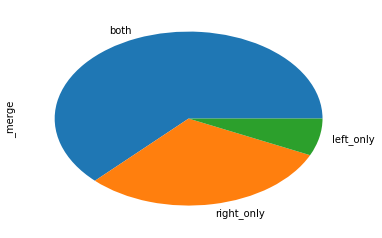

In [31]:
dfBW_tick['_merge'].value_counts().plot(kind='pie')


In [32]:

dfBW_tick['_merge'].value_counts(normalize=True)['both']

0.62672811059907829

<div class="alert alert-info">
L'hyptohèse est confirmé dans 0.642% des cas. Il n'y a que 15 mots sur 149 qui ne repectent pas cette règle.
</div>

In [33]:
#affichage des cas où les mots de buchanan qui se terminent en tic ne prennent pas de k final dans walker
dfBW_tick[dfBW_tick['_merge'] == "left_only"]

,hwdR,hwdK,_merge
3,anacreontic,anacreontick,left_only
4,antartic,antartick,left_only
6,antiscorbutic,antiscorbutick,left_only
21,chylopoetic,chylopoetick,left_only
32,drastic,drastick,left_only
59,hypogastic,hypogastick,left_only
73,nosopoetic,nosopoetick,left_only
87,pentastic,pentastick,left_only
93,phonocamptic,phonocamptick,left_only
95,phrentic,phrentick,left_only


---
## Comparaison (old)
- Identifier les hwd communs aux deux dicos (et de même POS)
- Ne conserver que les entrées dont le shcAccent est différent

### fusion des dictionnaires par hwdR et posR

In [34]:
intersect = pd.merge(WalkerR, BuchananR, on=['hwdR','posR'])
intersect.head(3)

,hwdR,posR,schAccentR_x,schAccentR_y
0,abandon,verb,0-1-0,0-1-0
1,abase,verb,0-1,0-1
2,abasement,noun,0-1-0,0-1-0-0


In [35]:
print('nb hwd WalkerR',len(WalkerR) )
print('nb hwd BuchananR',len(BuchananR) )
print('nb intersection hwd',len(intersect))

nb hwd WalkerR 38688
nb hwd BuchananR 26229
nb intersection hwd 13317


In [36]:
#renommer les colonnes
intersect = intersect.rename(columns={"schAccentR_x": "schAccentR_Walker","schAccentR_y":"schAccentR_Buchanan"})
intersect.head(3)

,hwdR,posR,schAccentR_Walker,schAccentR_Buchanan
0,abandon,verb,0-1-0,0-1-0
1,abase,verb,0-1,0-1
2,abasement,noun,0-1-0,0-1-0-0


In [37]:
print("nb de hwd communs",len(intersect))

nb de hwd communs 13317


### Comparer le nombre de syllabes

In [38]:
sentence = '1-0-0'
len(re.findall(r'\d',sentence))

3

In [40]:
#fonction permettant de compter le nombre de syllabes 
#à partir d'un schéma accentuel de la forme 0-0-1
def countSyll(schAccent):
    
    #str(schAccent).count('-')+1
    
    if schAccent == None:
        return 0
    else:
        return len(re.findall(r'\d',schAccent))


In [41]:
intersect['nbSyllBuchanan'] =  intersect.apply(lambda x: countSyll(x.schAccentR_Buchanan),1)
intersect['nbSyllWalker'] =  intersect.apply(lambda x: countSyll(x.schAccentR_Walker),1)

In [42]:
# Exporter les headword où le nombre de syllabe est différent
dfVarNbSyll = intersect.loc[~(intersect['nbSyllBuchanan'] == intersect['nbSyllWalker'])].copy()
print('nb occ. var nb syll',len(dfVarNbSyll))
dfVarNbSyll['diffNbSyll'] = dfVarNbSyll['nbSyllBuchanan']-dfVarNbSyll['nbSyllWalker']
print(dfVarNbSyll['diffNbSyll'].value_counts())

dfVarNbSyll.to_csv(pathOutputCSV+"dfWB_varnbSyll.csv", encoding="utf8",sep =";",index=False)

nb occ. var nb syll 1108
-1    576
 1    376
-2     59
-3     49
-4     30
-5     11
 2      3
-6      3
-7      1
Name: diffNbSyll, dtype: int64


In [43]:
#afficher les lignes où la difference du nombre de syll. est XdiffNbSyll
XdiffNbSyll = -3
dfVarNbSyll[dfVarNbSyll['diffNbSyll']==XdiffNbSyll]

,hwdR,posR,schAccentR_Walker,schAccentR_Buchanan,nbSyllBuchanan,nbSyllWalker,diffNbSyll
1677,cognizance,noun,1-0-0 or 1-0-0,1-0-0,3,6,-3
1708,colloquy,noun,1-0-0,,0,3,-3
2520,denigrate,verb,1-0-0 or 0-1-0,1-0-0,3,6,-3
3355,environs,noun,0-0-1 or 0-1-0,0-1-0,3,6,-3
4463,hegira,noun,0-1-0 or 1-0-0,1-0-0,3,6,-3
4604,hyacinth,noun,1-0-0,,0,3,-3
4737,importance,noun,0-1-0 or 0-1-0,0-1-0,3,6,-3
5171,interstice,noun,1-0-0 or 0-1-0,0-1-0,3,6,-3
5964,maple-tree,noun,1-0-0,,0,3,-3
6180,meteor,noun,1-0-0 or 1-0-0,1-0-0,3,6,-3


# Separer la colonne schAccentR_Walker quand il y a deux pron

In [44]:
dfVarNbSyllBis = dfVarNbSyll.copy()
dfVarNbSyllBis[['1','2','3']] = dfVarNbSyllBis['schAccentR_Walker'].str.split(' or ',expand=True)
dfVarNbSyllBis.head(10)


,hwdR,posR,schAccentR_Walker,schAccentR_Buchanan,nbSyllBuchanan,nbSyllWalker,diffNbSyll,1,2,3
2,abasement,noun,0-1-0,0-1-0-0,4,3,1,0-1-0,None,None
5,abatement,noun,0-1-0,0-1-0-0,4,3,1,0-1-0,None,None
27,abortiveness,noun,0-1-0-0,0-1-0-0-0,5,4,1,0-1-0-0,None,None
44,absoluteness,noun,1-0-0-0,1-0-0-0-0,5,4,1,1-0-0-0,None,None
51,abstruseness,noun,0-1-0,0-1-0-0,4,3,1,0-1-0,None,None
60,academian,noun,0-0-1-0-0,0-0-1-0,4,5,-1,0-0-1-0-0,None,None
62,academist,noun,0-1-0-0 or 1-0-0-0,0-1-0-0,4,8,-4,0-1-0-0,1-0-0-0,None
63,academy,noun,0-1-0-0 or 1-0-0-0,0-1-0-0,4,8,-4,0-1-0-0,1-0-0-0,None
108,accurateness,noun,1-0-0-0,1-0-0-0-0,5,4,1,1-0-0-0,None,None
121,acme,noun,1-0,1,1,2,-1,1-0,None,None


In [45]:
#dfVarNbSyllBis['3'].value_counts()
#dfVarNbSyllBis.loc[dfVarNbSyllBis['3']=='1-0']

dfVarNbSyllBis.dropna(subset=['2'])

,hwdR,posR,schAccentR_Walker,schAccentR_Buchanan,nbSyllBuchanan,nbSyllWalker,diffNbSyll,1,2,3
62,academist,noun,0-1-0-0 or 1-0-0-0,0-1-0-0,4,8,-4,0-1-0-0,1-0-0-0,None
63,academy,noun,0-1-0-0 or 1-0-0-0,0-1-0-0,4,8,-4,0-1-0-0,1-0-0-0,None
1307,caprice,noun,0-1 or 1-0,0-1,2,4,-2,0-1,1-0,None
1471,chart,noun,0 or 0,0,1,2,-1,0,0,None
1492,chew,verb,0 or 0,0,1,2,-1,0,0,None
1507,china,noun,1-0 or 1-0,1-0,2,4,-2,1-0,1-0,None
1677,cognizance,noun,1-0-0 or 1-0-0,1-0-0,3,6,-3,1-0-0,1-0-0,None
1938,conquer,verb,1-0 or 1-0,1-0,2,4,-2,1-0,1-0,None
1983,construe,verb,1-0 or 1-0,1-0,2,4,-2,1-0,1-0,None
1989,consult,noun,1-0 or 0-1,1-0,2,4,-2,1-0,0-1,None


In [46]:
#walker où il y a une variation sur le nb de syll

dfVarNbSyllBis['nbSyllWalker1'] =  dfVarNbSyllBis.apply(lambda x: countSyll(x['1']),1)
dfVarNbSyllBis['nbSyllWalker2'] =  dfVarNbSyllBis.apply(lambda x: countSyll(x['2']),1)
#dfVarNbSyllBis

dfVarNbSyllBis['diffNbSyllWalker'] = dfVarNbSyllBis['nbSyllWalker1']-dfVarNbSyllBis['nbSyllWalker2']
dfVarNbSyllBis['diffNbSyllWalker'].value_counts()
dfVarNbSyllBisFilt = dfVarNbSyllBis.dropna(subset=['2'])
dfVarNbSyllBisFilt['diffNbSyllWalker'].value_counts()


 0    107
-1      4
 2      2
-2      1
Name: diffNbSyllWalker, dtype: int64

In [175]:
dfVarNbSyllBisFilt.loc[~(dfVarNbSyllBisFilt['diffNbSyllWalker'] == 0)]

,hwdR,posR,schAccentR_Walker,schAccentR_Buchanan,nbSyllBuchanan,nbSyllWalker,diffNbSyll,1,2,3,nbSyllWalker1,nbSyllWalker2,diffNbSyllWalker
6053,maundy-thursday,noun,1-0 or 1-0-0-0,,0,6,-6,1-0,1-0-0-0,None,2,4,-2
6225,millepedes,noun,1-0-0 or 0-1-0-0,0-1-0-0,4,7,-3,1-0-0,0-1-0-0,None,3,4,-1
6444,monastery,noun,1-0-0 or 1-0-0-0,1-0-0-0,4,7,-3,1-0-0,1-0-0-0,None,3,4,-1
9973,satire,noun,1-1-1-0 or 1-0,1-0,2,6,-4,1-1-1-0,1-0,None,4,2,2
11583,tapestry,noun,1-0 or 1-0-0,1-0-0,3,5,-2,1-0,1-0-0,None,2,3,-1
12707,venison,noun,1-0 or 1-0-0,1-0-0,3,5,-2,1-0,1-0-0,None,2,3,-1
12752,vertigo,noun,0-1-0-1-0 or 1-0-0,1-0-0,3,8,-5,0-1-0-1-0,1-0-0,None,5,3,2


### Filter pour ne garder que les lignes dont le schéma accentuel est différent

In [47]:
dfVarSchAcc = intersect.loc[~(intersect['schAccentR_Walker'] == intersect['schAccentR_Buchanan'])].copy()

#affichage des 15 ières lignes
dfVarSchAcc.head(15)


,hwdR,posR,schAccentR_Walker,schAccentR_Buchanan,nbSyllBuchanan,nbSyllWalker
2,abasement,noun,0-1-0,0-1-0-0,4,3
5,abatement,noun,0-1-0,0-1-0-0,4,3
12,abdomen,noun,0-1-0,0-0-0,3,3
21,ablution,noun,0-1-0,1-0-0,3,3
27,abortiveness,noun,0-1-0-0,0-1-0-0-0,5,4
44,absoluteness,noun,1-0-0-0,1-0-0-0-0,5,4
51,abstruseness,noun,0-1-0,0-1-0-0,4,3
60,academian,noun,0-0-1-0-0,0-0-1-0,4,5
62,academist,noun,0-1-0-0 or 1-0-0-0,0-1-0-0,4,8
63,academy,noun,0-1-0-0 or 1-0-0-0,0-1-0-0,4,8


In [48]:
#compter le nombre d'occurrence de chaque type de POS
dfVarSchAcc["posR"].value_counts()

noun    1530
verb     211
Name: posR, dtype: int64

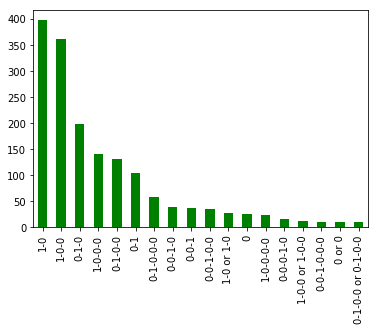

In [49]:
dfHisto = dfVarSchAcc["schAccentR_Walker"].value_counts()
dfHisto05Walker = dfHisto[dfHisto[:]>10]
dfHisto05Walker.plot(kind='bar', color='green')

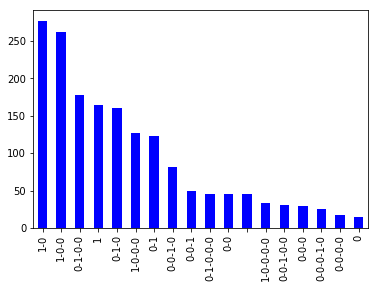

In [50]:
dfHisto = dfVarSchAcc["schAccentR_Buchanan"].value_counts()
dfHisto05Buch = dfHisto[dfHisto[:]>10]
dfHisto05Buch.plot(kind='bar', color='blue')

In [52]:
ddfHisto05Buch = dfHisto05Buch.to_frame(name='sch').reset_index()
ddfHisto05Walker = dfHisto05Walker.to_frame(name='sch').reset_index()


In [53]:
ddfHisto05Buch

,index,sch
0,1-0,277
1,1-0-0,262
2,0-1-0-0,178
3,1,164
4,0-1-0,160
5,1-0-0-0,127
6,0-1,123
7,0-0-1-0,82
8,0-0-1,50
9,0-1-0-0-0,46


In [54]:
ddfHisto05Walker

,index,sch
0,1-0,397
1,1-0-0,362
2,0-1-0,198
3,1-0-0-0,140
4,0-1-0-0,132
5,0-1,105
6,0-1-0-0-0,58
7,0-0-1-0,40
8,0-0-1,38
9,0-0-1-0-0,35


In [55]:
intersectHisto = pd.merge(ddfHisto05Buch, ddfHisto05Walker, on=['index','index'])


In [56]:
intersectHisto

,index,sch_x,sch_y
0,1-0,277,397
1,1-0-0,262,362
2,0-1-0-0,178,132
3,0-1-0,160,198
4,1-0-0-0,127,140
5,0-1,123,105
6,0-0-1-0,82,40
7,0-0-1,50,38
8,0-1-0-0-0,46,58
9,1-0-0-0-0,34,23


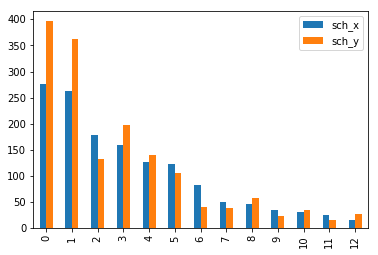

In [57]:
intersectHisto.plot(kind='bar')


### Sauvegarde du tableur resultat

In [58]:
pathFileOut = "./datas/Walker-Buchanan_varSchAcc.csv"
dfVarSchAcc.to_csv(pathFileOut,sep=';',encoding="utf-8")

---
# Etude sur la terminaison en double voyelle <a class="anchor" id="terminaisondoubleVoyelle"></a>


## Nous commencons par le sous groupe double OO
Exemple : baboon, cartoon...

In [59]:
df_dblOO = intersect[intersect.hwdR.str.contains(r'\w+oo\w{0,1}\b')]
print('nb occ. double oo',len(df_dblOO))
df_dblOO.head(3)

#TODO sortir toutes les occ.

nb occ. double oo 104


,hwdR,posR,schAccentR_Walker,schAccentR_Buchanan,nbSyllBuchanan,nbSyllWalker
297,afternoon,noun,1-0-1,1-0-0,3,3
349,alehoof,noun,1-0,1-0,2,2
821,baboon,noun,0-1,1-0,2,2


In [60]:
df_dblOO_VarSchAcc = df_dblOO.loc[~(df_dblOO['schAccentR_Walker'] == df_dblOO['schAccentR_Buchanan'])]
print('nb occ. double o avec variation pron.',len(df_dblOO_VarSchAcc))

df_dblOO_VarSchAcc

nb occ. double o avec variation pron. 14


,hwdR,posR,schAccentR_Walker,schAccentR_Buchanan,nbSyllBuchanan,nbSyllWalker
297,afternoon,noun,1-0-1,1-0-0,3,3
821,baboon,noun,0-1,1-0,2,2
4385,halloo,verb,0-1,1-0,2,2
7403,pantaloon,noun,0-0-1,1-0-0,3,3
7528,patacoon,noun,0-0-1,1-0-0,3,3
8247,powder-room,noun,1-0-0,,0,3
8398,presence-room,noun,1-0-0,,0,3
8976,rackoon,noun,0-1,1-0,2,2
9060,rattoon,noun,0-1,1-0,2,2
10370,shalloon,noun,0-1,1-0,2,2


# La meme chose avec le double ee

In [61]:
df_dblEE = intersect[intersect.hwdR.str.contains(r'\w+ee\w{0,1}\b')]
print('nb occ. double ee',len(df_dblEE))
df_dblEE_VarSchAcc = df_dblEE.loc[~(df_dblEE['schAccentR_Walker'] == df_dblEE['schAccentR_Buchanan'])]
print('nb occ. double ee avec variation pron.',len(df_dblEE_VarSchAcc))
df_dblEE_VarSchAcc


nb occ. double ee 109
nb occ. double ee avec variation pron. 16


,hwdR,posR,schAccentR_Walker,schAccentR_Buchanan,nbSyllBuchanan,nbSyllWalker
1466,charioteer,noun,0-0-0-1,0-0-1,3,4
4056,fusee,noun,0-1,1-0,2,2
4281,grantee,noun,0-1,1-0,2,2
5964,maple-tree,noun,1-0-0,,0,3
6579,muleteer,noun,1-0-1,0-0-1,3,3
7263,overseer,noun,0-0-1-0,0-0-1,3,4
7866,pickeer,verb,0-1,1-0,2,2
7925,pioneer,noun,0-0-1,0-1-0,3,3
7970,plane-tree,noun,1-0,,0,2
8402,presentee,noun,0-0-1,1-0-0,3,3


In [62]:
df_dblAA = intersect[intersect.hwdR.str.contains(r'\w+aa\w{0,1}\b')]
print('nb occ. double a',len(df_dblAA))


nb occ. double a 0


In [63]:
df_dblII = intersect[intersect.hwdR.str.contains(r'\w+ii\w{0,1}\b')]
print('nb occ. double i',len(df_dblII))

nb occ. double i 0


In [64]:
df_dblUU = intersect[intersect.hwdR.str.contains(r'\w+uu\w{0,1}\b')]
print('nb occ. double u',len(df_dblUU))
print(df_dblUU)
df_dblUU_VarSchAcc = df_dblUU.loc[~(df_dblUU['schAccentR_Walker'] == df_dblUU['schAccentR_Buchanan'])]
df_dblUU_VarSchAcc
print("mais pas de variation de pron !")

nb occ. double u 2
            hwdR  posR schAccentR_Walker schAccentR_Buchanan  nbSyllBuchanan  \
6133   menstruum  noun             1-0-0               1-0-0               3   
12617     vacuum  noun             1-0-0               1-0-0               3   

       nbSyllWalker  
6133              3  
12617             3  
mais pas de variation de pron !


In [65]:
df_dblYY = intersect[intersect.hwdR.str.contains(r'\w+uu\w{0,1}\b')]
print('nb occ. double y',len(df_dblYY))
print(df_dblYY)
df_dblYY_VarSchAcc = df_dblYY.loc[~(df_dblYY['schAccentR_Walker'] == df_dblYY['schAccentR_Buchanan'])]
df_dblYY_VarSchAcc
print("mais pas de variation de pron !")

nb occ. double y 2
            hwdR  posR schAccentR_Walker schAccentR_Buchanan  nbSyllBuchanan  \
6133   menstruum  noun             1-0-0               1-0-0               3   
12617     vacuum  noun             1-0-0               1-0-0               3   

       nbSyllWalker  
6133              3  
12617             3  
mais pas de variation de pron !
